# <u>Contribute to increased revenue</u>

Together with the marketing department, i will try and go over a list of compiled hypotheses that may help boost revenue.
I will prioritize these hypotheses, launch an A/B test, and analyze the results.

The data sets will be from three different sources:

1. hypotheses_us - All hypotheses and their descriptors will be included in the data set, as will user reach on a scale of 1 to 
   10 and impact on users on a scale of 1 to 10. confidence in the hypothesis with a scalar from 1 to 10, and the effort, which
   are the resources to test a hypothesis with a scalar from 1 to 10.
2. orders_us - This data set will include the ID identifier of the order and the user that made the order by date. In addition,
   the revenue as well as the group to which the users belong as part of the A/B test.   
3. visits_us - This data set includes the number of visits on the date specified in the A/B test group.


## Initialization

In [1]:
import pandas as pd
import statistics
from datetime import datetime
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from scipy import stats
from scipy import stats as st
import os
from functools import reduce
from statistics import mode
import matplotlib as mpl
from scipy.stats import levene
from IPython.core.interactiveshell import InteractiveShell
import glob
import plotly.express as px
import plotly.graph_objects as go
from plotly.graph_objects import Layout
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

## Loading data

In [2]:
#os.getcwd()
#os.chdir(r'C:\Users\wolff\Desktop\Practicom_projects\P_7')

In [3]:
try:
    hypotheses_df = pd.read_csv(r'C:\Users\wolff\Desktop\Practicom_projects\P_7\hypotheses_us.csv',sep=';')
    orders_df = pd.read_csv(r'C:\Users\wolff\Desktop\Practicom_projects\P_7\orders_us.csv')
    visits_df = pd.read_csv(r'C:\Users\wolff\Desktop\Practicom_projects\P_7\visits_us.csv')
except:
    hypotheses_df = pd.read_csv(r'/datasets/hypotheses_us.csv',sep=';')
    orders_df = pd.read_csv(r'/datasets/orders_us.csv')
    visits_df = pd.read_csv(r'/datasets/visits_us.csv')

## Studing genral information and prepering for analysis

In [4]:
def df_info(df):
    df.info(memory_usage='deep')
    print('')
    print('----------------------------------------')
    print(df.head())
    print('')

In [5]:
df_info(hypotheses_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 1.6 KB

----------------------------------------
                                                                                            Hypothesis  \
0                          Add two new channels for attracting traffic. This will bring 30% more users   
1                                    Launch your own delivery service. This will shorten delivery time   
2  Add product recommendation blocks to the store's site. This will increase conversion and average...   
3  Change the category structure. This will increase conversion since users will find the products ...   

In [6]:
hypotheses_df.columns= hypotheses_df.columns.str.lower()

In [7]:
print('Duplicates - ',hypotheses_df.duplicated().sum())

Duplicates -  0


In [8]:
df_info(orders_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 174.3 KB

----------------------------------------
   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     30.4     B
1     2804400009  3642806036  2019-08-15     15.2     B
2     2961555356  4069496402  2019-08-15     10.2     A
3     3797467345  1196621759  2019-08-15    155.1     B
4     2282983706  2322279887  2019-08-15     40.5     B



In [9]:
orders_df.date = pd.to_datetime(orders_df.date, format='%Y-%m-%d',dayfirst=True)
orders_df['group'] = orders_df['group'].astype('category')

In [10]:
orders_df.sort_values(by='visitorId')

,transactionId,visitorId,date,revenue,group
56,900025958,5114589,2019-08-16,10.8,B
573,1887336629,6958315,2019-08-04,25.9,B
71,3679129301,8300375,2019-08-01,165.7,B
703,4293855558,8300375,2019-08-07,30.5,A
233,797272237,11685486,2019-08-23,100.4,A
...,...,...,...,...,...
682,1216533772,4266935830,2019-08-29,1220.2,B
886,51443164,4278982564,2019-08-05,385.7,A
576,2724331495,4279090005,2019-08-04,105.3,B
392,3796325351,4281247801,2019-08-25,45.6,B


In [11]:
orders_duplicated = orders_df.groupby('visitorId',as_index=False).agg({'group':'nunique'})
duplicated_data = orders_duplicated.query('group == 2')
print('There are {:} clients who participated in both groups.'.format(len(duplicated_data)))

There are 58 clients who participated in both groups.


In [12]:
duplicated_data_list = list(orders_duplicated.query('group == 2')['visitorId'])

In [13]:
full_orders_df = orders_df.copy()
orders_df = orders_df.query('visitorId not in  @duplicated_data_list')
orders_df

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [14]:
df_info(visits_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 8.2 KB

----------------------------------------
         date group  visits
0  2019-08-01     A     719
1  2019-08-02     A     619
2  2019-08-03     A     507
3  2019-08-04     A     717
4  2019-08-05     A     756



In [15]:
visits_df.date = pd.to_datetime(visits_df.date, format='%Y-%m-%d',dayfirst=True)
visits_df['group'] = visits_df['group'].astype('category')

In [16]:
df_info(visits_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.4 KB

----------------------------------------
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756



**<u>Conclusion:</u>**
1. Orders_df had 58 duplicates, some visitors have gotten into both group A and B
2. Data type was changed appropriately for date format and category
3. Columns headers changed to lower case

## Prioritizing Hypotheses 

### ICE prioritization

In [17]:
#ice score = (impact*confidence)/effort
hypotheses_df['ICE'] = round(((hypotheses_df['impact']*hypotheses_df['confidence'])/hypotheses_df['effort']),2)

In [18]:
ICE = hypotheses_df[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)
ICE

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.20
0,Add two new channels for attracting traffic. This will bring 30% more users,13.33
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.20
6,Show banners with current offers and sales on the main page. This will boost conversion,8.00
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,7.00
1,Launch your own delivery service. This will shorten delivery time,2.00
5,Add a customer review page. This will increase the number of orders,1.33
3,Change the category structure. This will increase conversion since users will find the products ...,1.12
4,Change the background color on the main page. This will increase user engagement,1.00


### RICE prioritization

In [19]:
#ice score = (reach*impact*confidence)/effort
hypotheses_df['RICE'] = round(((hypotheses_df['reach']*hypotheses_df['impact']*hypotheses_df['confidence'])/
                               hypotheses_df['effort']),2)

In [20]:
RICE = hypotheses_df[['hypothesis','RICE']].sort_values(by='RICE',ascending=False)
RICE

,hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,40.0
8,Launch a promotion that gives users discounts on their birthdays,16.2
3,Change the category structure. This will increase conversion since users will find the products ...,9.0
1,Launch your own delivery service. This will shorten delivery time,4.0
5,Add a customer review page. This will increase the number of orders,4.0
4,Change the background color on the main page. This will increase user engagement,3.0


### How prioritization changes when using the different methods?

In [21]:
hypotheses_df

,hypothesis,reach,impact,confidence,effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.33,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.00,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average...,8,3,7,3,7.00,56.0
3,Change the category structure. This will increase conversion since users will find the products ...,8,3,3,8,1.12,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.00,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.33,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.00,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.20,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.20,16.2


We can see that the top 5 are the top 5 in both methods, but the diffrence in the order of the hypotheses. Also the last one is the same for both. 


When we want to isolate the reach element, we use rice, and in our case with an online store, we want to know and separate the reach and impact we have.

****

## A/B test analysis 


### cumulative revenue by group

In [22]:
orders_df

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [23]:
datesGroups = orders_df[['date', 'group']].drop_duplicates()

In [24]:
group_column = orders_df['group']
orders_df['group'] = pd.Categorical(group_column, categories=group_column.unique(), ordered=True)

In [25]:
#revenue by group
ordersAggregated = datesGroups.apply(
    lambda x: orders_df[
        np.logical_and(
            orders_df['date'] <= x['date'], orders_df['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
group_column_2 = visits_df['group']
visits_df['group'] = pd.Categorical(group_column_2, categories=group_column.unique(), ordered=True)

In [27]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits_df[
        np.logical_and(
            visits_df['date'] <= x['date'], visits_df['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [28]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [29]:
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

In [30]:
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845


In [31]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

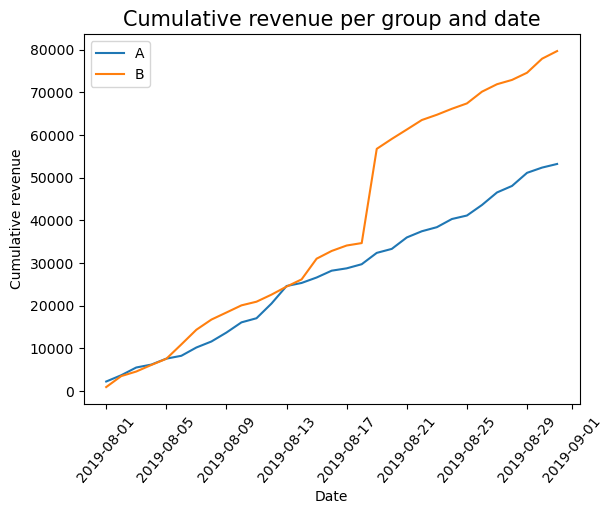

In [32]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative revenue per group and date',fontsize=15)
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Cumulative revenue')
plt.legend()
plt.show();

Revenue is steadily increasing for both groups. 

We can see from 8/05/2019 that GroupB is increasing more rapidly and at a higher rate, with another spike around 8/13/2019, 8/18/2019 and 8/20/2019. 

We can can see clearly that GroupB cumulative revenue is higher all through the dates we checked. 
High number of orders or very expensive orders could explain group B spike.

***

### cumulative order size  by group

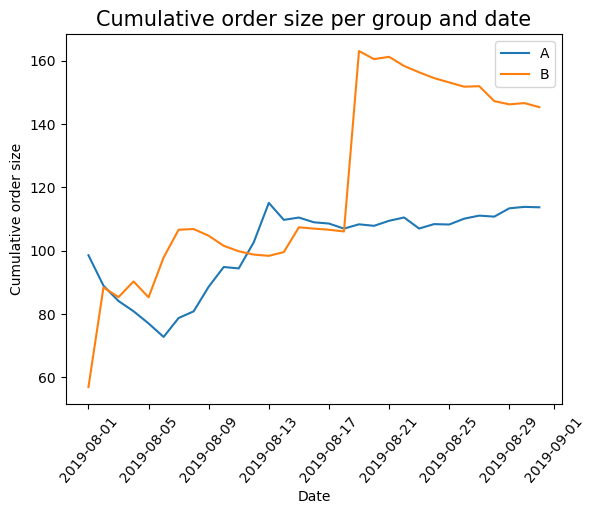

In [33]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative order size per group and date',fontsize=15)
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Cumulative order size')
plt.legend()
plt.show();

We can see that both groups see spikes in cumulative order size at certain points.

However, as of around 8/18/2019, we can clearly see Group B's order size spikes above Group A, and the Cumulative order size per group is much higher.

***

### Relative difference in cumulative average order size for group B compared with group A

In [34]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,2266.6,23,967.2,17
1,2019-08-02,3734.9,42,3535.3,40
2,2019-08-03,5550.1,66,4606.9,54
3,2019-08-04,6225.6,77,6138.5,68
4,2019-08-05,7623.6,99,7587.8,89


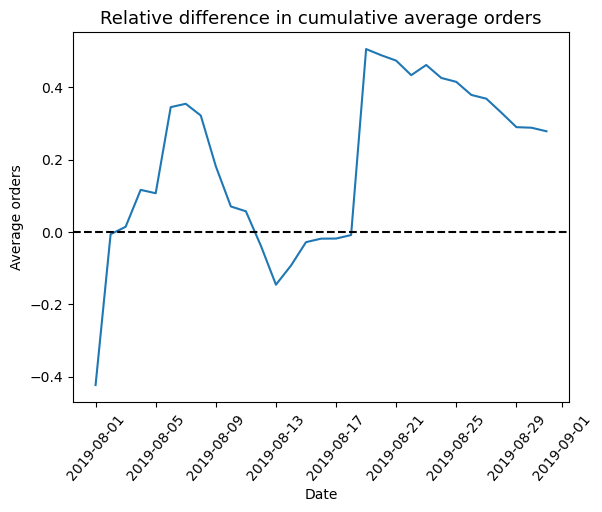

In [35]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Relative difference in cumulative average orders',fontsize=13)
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Average orders')
plt.axhline(y=0, color='black', linestyle='--')
plt.show();

At several points, the difference spikes. This implies that, as we saw above, there must be a few large orders in the data.

***

### Each group's conversion rate as the ratio of orders to the number of visits for each day

In [36]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [37]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

GroupA:
        date group  orders  buyers  revenue  visitors  conversion
0 2019-08-01     A      23      19   2266.6       719    0.031989
2 2019-08-02     A      42      36   3734.9      1338    0.031390
4 2019-08-03     A      66      60   5550.1      1845    0.035772
6 2019-08-04     A      77      71   6225.6      2562    0.030055
8 2019-08-05     A      99      92   7623.6      3318    0.029837
----------------------------------------------------------------------
Convertion Rate avg groupA 0.027
----------------------------------------------------------------------
GroupB:
        date group  orders  buyers  revenue  visitors  conversion
1 2019-08-01     B      17      17    967.2       713    0.023843
3 2019-08-02     B      40      39   3535.3      1294    0.030912
5 2019-08-03     B      54      53   4606.9      1803    0.029950
7 2019-08-04     B      68      66   6138.5      2573    0.026428
9 2019-08-05     B      89      87   7587.8      3280    0.027134
-----------------

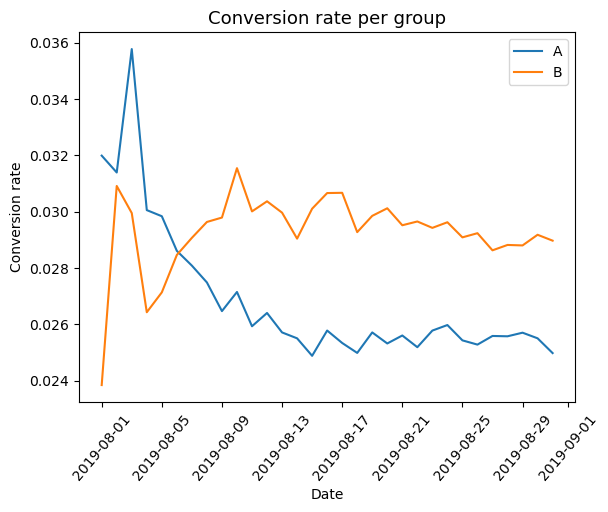

In [38]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
print('GroupA:')
print(cumulativeDataA.head())
print('----------------------------------------------------------------------')
print('Convertion Rate avg groupA', round(cumulativeDataA.conversion.mean(),3))
print('----------------------------------------------------------------------')
print('GroupB:')
print(cumulativeDataB.head())
print('----------------------------------------------------------------------')
print('Convertion Rate avg groupB', round(cumulativeDataB.conversion.mean(),3))
print('----------------------------------------------------------------------')
plt.title('Conversion rate per group',fontsize=13)
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.legend()
plt.show();

As we can see at the beginning, GroupA was leading the conversation rate, but around June 8, 2019, GroupB took the lead. After that, both groups stabilized, with Group B ahead of Group A.

***

In [39]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', 
                                                                           how='left', suffixes=['A', 'B'])
mergedCumulativeConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.023843
1,2019-08-02,0.031390,0.030912
2,2019-08-03,0.035772,0.029950
3,2019-08-04,0.030055,0.026428
4,2019-08-05,0.029837,0.027134


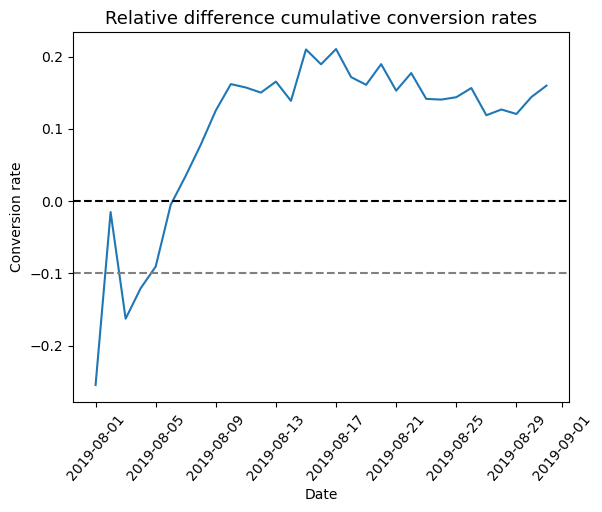

In [40]:
plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
) 

plt.title('Relative difference cumulative conversion rates',fontsize=13)
plt.xticks(rotation=50)
plt.xlabel('Date')
plt.ylabel('Conversion rate')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show();




If we look at the relative differences for the cumulative conversion rates, we can see that at the beginning of the test group B, it was gradually increasing and then abruptly decreasing, and then it began to increase once more and kept so steadily.

We can conclude that the conversion ratio is not yet stable and that it is too soon to draw any conclusions. We need to look at the outliers in the data to see if that might be the reason.

***

### Number of orders per user

In [41]:
ordersperuser = orders_df.groupby('visitorId',as_index=False).agg({'transactionId':'nunique'})
ordersperuser.columns = ['visitsid','orders']
ordersperuser.sort_values(by='orders',ascending=False)

,visitsid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
...,...,...
331,1438226485,1
332,1452540367,1
333,1455323168,1
334,1455861274,1


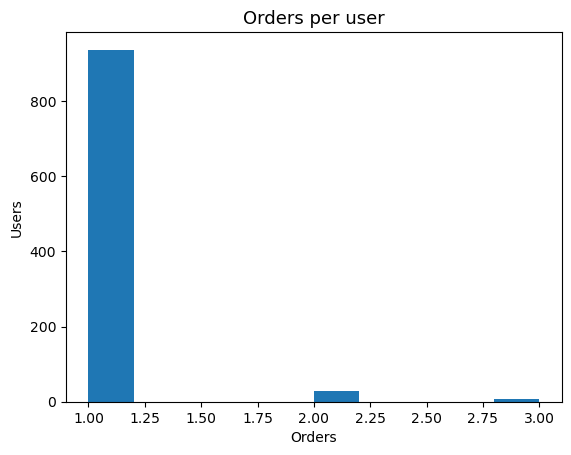

In [42]:
plt.hist(ordersperuser['orders'])
plt.title('Orders per user',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Users')
plt.show();

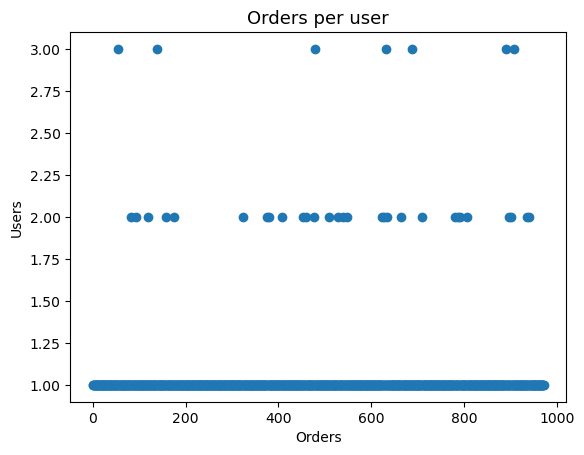

In [43]:
x_values = pd.Series(range(0,len(ordersperuser))) 

plt.scatter(x_values,ordersperuser['orders'])
plt.title('Orders per user',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Users')
plt.show();

### 95th and 99th percentiles for the number of orders per user

In [44]:
print('95th percentile:', np.percentile(ordersperuser['orders'],95))
print('99th percentile:', np.percentile(ordersperuser['orders'],99))

95th percentile: 1.0
99th percentile: 2.0


The most common order per user is one order.

With outliers being above that, we can see in the graphs that there are outliers with 2 and 3 orders per user.

1% of users is ordering more then one order.

***

### Scatter chart of order prices

In [45]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


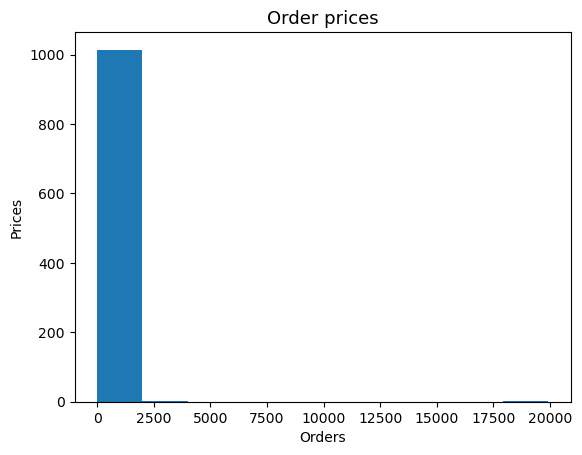

In [46]:
plt.hist(orders_df['revenue'])
plt.title('Order prices',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Prices')
plt.show();

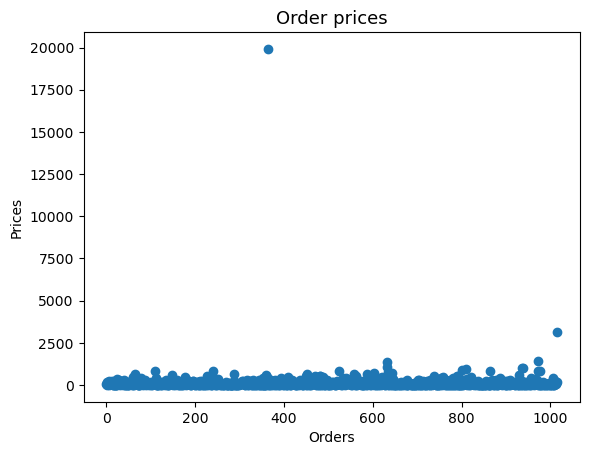

In [47]:
x_values_rev = pd.Series(range(0,len(orders_df['revenue']))) 

plt.scatter(x_values_rev,orders_df['revenue'])
plt.title('Order prices',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Prices')
plt.show();

In [48]:
orders_df.revenue.describe()
orders_df.revenue.mode()

count     1016.000000
mean       130.770866
std        648.079810
min          5.000000
25%         20.775000
50%         50.100000
75%        126.950000
max      19920.400000
Name: revenue, dtype: float64

0    20.2
Name: revenue, dtype: float64

The majority of the users are ordering less than 2500, as the most frequent order is 20.2 (we can't tell that from the graph).
We have two outliers and abnormal points in the graph; around 2500 and around 20000 appear to be extremely high, which could be a mistake.

***

In [49]:
orders_df.sort_values(by='revenue',ascending=False)

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
...,...,...,...,...,...
414,2505918657,2524310328,2019-08-06,5.2,B
908,3352225027,1807547430,2019-08-05,5.2,B
404,2052514069,1995481842,2019-08-28,5.1,B
602,2356264591,1224903511,2019-08-09,5.1,A


In [50]:
orders_df_sorted = orders_df[orders_df['revenue'] <= 1425.8]
orders_df_sorted.sort_values(by='revenue',ascending=False)

,transactionId,visitorId,date,revenue,group
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A
...,...,...,...,...,...
414,2505918657,2524310328,2019-08-06,5.2,B
908,3352225027,1807547430,2019-08-05,5.2,B
404,2052514069,1995481842,2019-08-28,5.1,B
602,2356264591,1224903511,2019-08-09,5.1,A


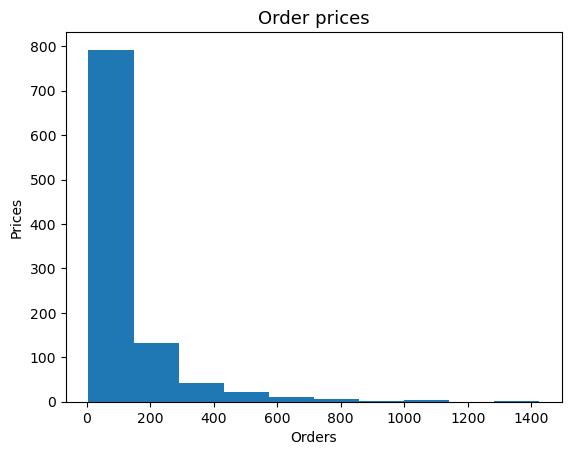

In [51]:
plt.hist(orders_df_sorted['revenue'])
plt.title('Order prices',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Prices')
plt.show();

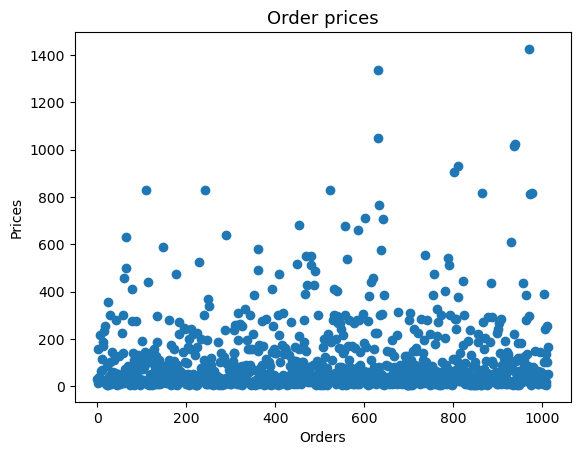

In [52]:
x_values_rev = pd.Series(range(0,len(orders_df_sorted['revenue']))) 

plt.scatter(x_values_rev,orders_df_sorted['revenue'])
plt.title('Order prices',fontsize=13)
plt.xlabel('Orders')
plt.ylabel('Prices')
plt.show();

### 95th and 99th percentiles of order prices

In [53]:
print('95th percentile:', round(np.percentile(orders_df['revenue'],95),2))
print('99th percentile:', round(np.percentile(orders_df['revenue'],99),2))

95th percentile: 414.28
99th percentile: 830.3


* 95% of our users hase produced us revenue of 414.28 and lower, that means that 5% of users produced us revenue above that. 

* 99% of our users hase produced us revenue of 830.3 and lower, that means that 1% of users produced us revenue above that.

***

### Statistical significance of the difference in conversion between the groups using the raw data

* H0 = No diffrences in conversion between the groups

* H1 = We don't have enough evidence to state that there are no diffrences in conversion between the groups

In [54]:
orders_df.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [55]:
visits_df.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [56]:
alpha = 0.5 

odersByusersA = orders_df[orders_df['group']=='A'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
odersByusersB = orders_df[orders_df['group']=='B'].groupby('visitorId',as_index=False).agg({'transactionId':pd.Series.nunique})
odersByusersA.columns = ['visitorId','transactionId']
odersByusersB.columns = ['visitorId','transactionId']

SampleA = pd.concat(
    [
        odersByusersA['transactionId'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'A']['visits'].sum() - len(odersByusersA['transactionId'])
            ),name ='transactionId'
        )
    ],axis=0
)


SampleB = pd.concat(
    [
        odersByusersB['transactionId'],pd.Series(
            0,index = np.arange(
                visits_df[visits_df['group'] == 'B']['visits'].sum() - len(odersByusersB['transactionId'])
            ),name ='transactionId'
        )
    ],axis=0
)

In [57]:
print('Relative gain:',"{0:.3f}".format(SampleB.mean()/SampleA.mean()-1))
print('-----------------------------------------')
results = st.mannwhitneyu(SampleA, SampleB)[1]
print('p-Value',"{0:.3f}".format(results))
print('-----------------------------------------')
if(results < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

Relative gain: 0.160
-----------------------------------------
p-Value 0.011
-----------------------------------------
We reject the null hypothesis


* Based on the raw data We don't have enough evidence to state that there are no diffrences in conversion between the groups
(p-value is smaller then alpha).

* The relative gain we have from GroupB is 16% 

***

### Statistical significance of the difference in average order size between the groups using the raw data

* H0 = There is diffrences in average order size between the groups

* H1 = We don't have enough evidence to state that there is diffrences in average order size between the groups

In [58]:
print('Significance of the difference:',"{0:.3f}".format(
    orders_df[orders_df['group'] == 'B']['revenue'].mean()/orders_df[orders_df['group']=='A']['revenue'].mean()-1)
     )
print('-----------------------------------------')
results_orders = st.mannwhitneyu(
    orders_df[orders_df['group'] == 'A']['revenue'], orders_df[orders_df['group'] == 'B']['revenue']
)[1]

print('p-Value',"{0:.3f}".format(results_orders))
print('-----------------------------------------')
if(results_orders < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

Significance of the difference: 0.278
-----------------------------------------
p-Value 0.862
-----------------------------------------
We cant reject the null hypothesis


* We can see that the p-value is much higher than alpha, so we can't reject H0 and say that there is no difference in average order size between the groups.

* We can also see that the significance of the difference is around 30%, which means the average order size for group B is 30% higher than in group A.

***

### Significance of the difference in conversion between the groups using the filtered data

* H0 = No diffrences in conversion between the groups

* H1 = We don't have enough evidence to state that there are no diffrences in conversion between the groups

In [59]:
odersByusersA.head()

,visitorId,transactionId
0,11685486,1
1,54447517,1
2,66685450,1
3,78758296,1
4,85103373,1


In [60]:
# anomalies recorder
users_orders_many = pd.concat([
    odersByusersA[odersByusersA['transactionId'] > 1]['visitorId'],
    odersByusersB[odersByusersB['transactionId'] > 1]['visitorId']],axis=0)
users_orders_exp = orders_df[orders_df['revenue'] > 435.54]['visitorId']

abnormal_users = pd.concat([users_orders_many,users_orders_exp],axis=0).drop_duplicates().sort_values()
abnormal_users.head()
abnormal_users.shape

1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
Name: visitorId, dtype: int64

(83,)

In [61]:
SampleA_filtered = pd.concat([odersByusersA[np.logical_not(odersByusersA['visitorId'].isin(
    abnormal_users))]['transactionId'],pd.Series(0,index=np.arange(
    visits_df[visits_df['group'] == 'A']['visits'].sum() - len(odersByusersA['transactionId'])),name ='transactionId'
)],axis = 0)

SampleB_filtered = pd.concat([odersByusersB[np.logical_not(odersByusersB['visitorId'].isin(
    abnormal_users))]['transactionId'],pd.Series(0,index=np.arange(
    visits_df[visits_df['group'] == 'B']['visits'].sum() - len(odersByusersB['transactionId'])),name ='transactionId'
)],axis = 0)

In [62]:
print('Relative gain:',"{0:.3f}".format(SampleB_filtered.mean()/SampleA_filtered.mean()-1))
print('-----------------------------------------')
results = st.mannwhitneyu(SampleA_filtered, SampleB_filtered)[1]
print('p-Value',"{0:.3f}".format(results))
print('-----------------------------------------')
if(results < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')

Relative gain: 0.181
-----------------------------------------
p-Value 0.012
-----------------------------------------
We reject the null hypothesis


* We found 83 anomolies and filtered the data.
* Based on the filtered data We still don't have enough evidence to state that there are no differences in conversion between the groups.
(The p-value remains less than alpha.)

* The relative gain we have from Group B is 18%, which is 2% higher.

***

### Statistical significance of the difference in average order size between the groups using the filtered data

In [63]:
print('Significance of the difference:',"{0:.3f}".format(
    orders_df[np.logical_and(orders_df['group'] == 'B',np.logical_not(orders_df['visitorId'].isin(abnormal_users)))]['revenue'].mean()/
    orders_df[np.logical_and(orders_df['group'] == 'A',np.logical_not(orders_df['visitorId'].isin(abnormal_users)))]['revenue'].mean()-1))

print('-----------------------------------------')

results_orders_filtered = st.mannwhitneyu(orders_df[np.logical_and(orders_df['group'] == 'A',np.logical_not(
        orders_df['visitorId'].isin(abnormal_users)))]['revenue'],orders_df[np.logical_and(orders_df['group'] == 'B',np.logical_not(
        orders_df['visitorId'].isin(abnormal_users)))]['revenue'])[1]

print('p-Value',"{0:.3f}".format(results_orders_filtered))
print('-----------------------------------------')
if(results_orders < alpha):
    print('We reject the null hypothesis')
else:
    print('We cant reject the null hypothesis')    

Significance of the difference: -0.006
-----------------------------------------
p-Value 0.897
-----------------------------------------
We cant reject the null hypothesis


* We can see that the p-value is much higher than alpha, so we still can't reject H0 and say that there is no difference in 
  average order size between the groups.

* We can also see that the significance of the difference is around -1% instead of what we had with the raw data, which was 
  around 30%.

  
* If we are at a negative in our significance of the difference, that means that GroupA took back the lead from GroupB in 
  regards to the average order size.


***

### Decision based on the test results

**<u>Cumulative metrics summary<u/>**

| Group | Cumulative revenue per group | Cumulative order size per group| Conversion rate per group |
| --- | --- | --- |--- |
| GroupB |lead| lead |lead |
| GroupA | Not lead | Not lead |Not lead |

* GroupB is leading in regards to the cumulative metrics

**<u>Statistical test summary<u/>**

| Test | Data Used | Significance|H0|Relative gain |Comment|
| --- | --- | --- |--- |--- |--- |
| significance of the difference in conversion between the groups |Raw| --|Reject|16% |
| significance of the difference in average order size between the groups | Raw | ~30% |cant reject |--|
| significance of the difference in conversion between the groups | clean |--|Reject |18% |
| significance of the difference in average order size between the groups | clean |-1%|cant reject |--|GroupA took back the lead from GroupB|

In the statistical tests, we had 83 outliers removed, and as we saw, it didn't change the tests.

We can see from the results that GroupB has a clear lead and win, with a slight improvement after the clean data for the significance of the difference in average order size between the groups, allowing GroupA to have a 1% lead in order sizes but this is not significant.



**Bottem line is that we can say that GroupB is the clear winner also after cleaning outliers and we can stop the test**